## import 套件

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


## 讀取資料
- 請將 FILE_PATH 改為自己的檔案路徑
- 使用nrows參數限制讀取的資料筆數，避免讀到空的資料
- 以head檢查前五筆資料

In [3]:
data = pd.read_excel(FILE_PATH, nrows=1000)
data.head()

,id,annual_inc,dti,inq_last_6mths,loan_status,home_ownership,purpose,verification_status,grade,funded_amnt,...,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_rev_tl,num_op_rev_tl,num_rev_accts,num_tl_120dpd_2m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim
0,1,76000.0,28.83,2,0,0,2,2,3,25000,...,0.0,0,12,12,16,NaN,3,81.8,0,94435
1,2,37000.0,15.57,0,1,2,2,1,2,6000,...,6.0,0,5,6,7,0.0,2,25.0,0,27385
2,3,39000.0,6.09,1,1,1,0,1,3,1500,...,2.0,1,2,5,5,0.0,2,0.0,0,125293
3,4,69000.0,23.79,0,1,1,4,1,3,16000,...,12.0,0,2,2,3,0.0,0,100.0,0,231425
4,5,30000.0,30.80,3,1,2,0,1,3,1500,...,3.0,0,7,9,22,0.0,5,33.3,1,40378


## 缺失值處理

#### 1. 檢查缺失值筆數

In [4]:
data.isna().sum()

id                          0
annual_inc                  0
dti                         0
inq_last_6mths              0
loan_status                 0
home_ownership              0
purpose                     0
verification_status         0
grade                       0
funded_amnt                 0
installment                 0
delinq_2yrs                 0
mths_since_last_delinq    465
open_acc                    0
pub_rec                     0
revol_bal                   0
acc_now_delinq              0
tot_coll_amt                0
open_acc_6m                 0
open_act_il                 0
open_rv_12m                 0
max_bal_bc                  0
all_util                    1
inq_fi                      0
bc_open_to_buy             12
bc_util                    13
delinq_amnt                 0
mo_sin_old_rev_tl_op        0
mo_sin_rcnt_rev_tl_op       0
mort_acc                    0
mths_since_recent_inq      77
num_accts_ever_120_pd       0
num_actv_rev_tl             0
num_op_rev

#### 2. 刪除缺失值過多的欄位

In [5]:
data.drop('mths_since_last_delinq', axis=1, inplace=True)
data.head()

,id,annual_inc,dti,inq_last_6mths,loan_status,home_ownership,purpose,verification_status,grade,funded_amnt,...,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_rev_tl,num_op_rev_tl,num_rev_accts,num_tl_120dpd_2m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim
0,1,76000.0,28.83,2,0,0,2,2,3,25000,...,0.0,0,12,12,16,NaN,3,81.8,0,94435
1,2,37000.0,15.57,0,1,2,2,1,2,6000,...,6.0,0,5,6,7,0.0,2,25.0,0,27385
2,3,39000.0,6.09,1,1,1,0,1,3,1500,...,2.0,1,2,5,5,0.0,2,0.0,0,125293
3,4,69000.0,23.79,0,1,1,4,1,3,16000,...,12.0,0,2,2,3,0.0,0,100.0,0,231425
4,5,30000.0,30.80,3,1,2,0,1,3,1500,...,3.0,0,7,9,22,0.0,5,33.3,1,40378


#### 3.補值（平均值）
- 找出有缺失值的欄位
- 使用for迴圈，將有缺失值的欄位補值
- 檢查是否還有缺失值

In [6]:
missing_cols = data.columns[data.isna().any()].to_list()
missing_cols

['all_util',
 'bc_open_to_buy',
 'bc_util',
 'mths_since_recent_inq',
 'num_tl_120dpd_2m',
 'percent_bc_gt_75']

In [7]:
for col in missing_cols:
    data[col].fillna(data[col].mean(), inplace=True)
data.isna().sum()

id                       0
annual_inc               0
dti                      0
inq_last_6mths           0
loan_status              0
home_ownership           0
purpose                  0
verification_status      0
grade                    0
funded_amnt              0
installment              0
delinq_2yrs              0
open_acc                 0
pub_rec                  0
revol_bal                0
acc_now_delinq           0
tot_coll_amt             0
open_acc_6m              0
open_act_il              0
open_rv_12m              0
max_bal_bc               0
all_util                 0
inq_fi                   0
bc_open_to_buy           0
bc_util                  0
delinq_amnt              0
mo_sin_old_rev_tl_op     0
mo_sin_rcnt_rev_tl_op    0
mort_acc                 0
mths_since_recent_inq    0
num_accts_ever_120_pd    0
num_actv_rev_tl          0
num_op_rev_tl            0
num_rev_accts            0
num_tl_120dpd_2m         0
num_tl_op_past_12m       0
percent_bc_gt_75         0
p

## 基本統計量

In [8]:
data.describe()

,id,annual_inc,dti,inq_last_6mths,loan_status,home_ownership,purpose,verification_status,grade,funded_amnt,...,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_rev_tl,num_op_rev_tl,num_rev_accts,num_tl_120dpd_2m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,500.500000,74691.558430,19.268200,0.610000,0.710000,1.268000,2.906000,1.817000,2.716000,14303.525000,...,5.994583,0.555000,5.355000,8.095000,14.132000,0.002086,2.530000,41.939372,0.139000,1.693821e+05
std,288.819436,51513.266731,9.119612,0.862928,0.453989,0.669794,1.488415,0.871935,1.252563,8956.722605,...,5.358889,1.330694,3.259386,4.570872,7.880144,0.044697,2.101313,36.710337,0.394759,1.661844e+05
min,1.000000,7100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1000.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.400000e+03
25%,250.750000,46000.000000,12.835000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000,7125.000000,...,2.000000,0.000000,3.000000,5.000000,9.000000,0.000000,1.000000,0.000000,0.000000,5.024575e+04
50%,500.500000,63945.000000,18.045000,0.000000,1.000000,1.000000,3.000000,2.000000,3.000000,12000.000000,...,5.000000,0.000000,5.000000,7.000000,13.000000,0.000000,2.000000,33.300000,0.000000,1.087810e+05
75%,750.250000,90000.000000,25.335000,1.000000,1.000000,2.000000,3.000000,3.000000,3.000000,20000.000000,...,8.000000,1.000000,7.000000,10.000000,18.000000,0.000000,4.000000,71.400000,0.000000,2.437940e+05
max,1000.000000,800000.000000,52.670000,4.000000,1.000000,2.000000,10.000000,3.000000,7.000000,40000.000000,...,23.000000,13.000000,24.000000,34.000000,50.000000,1.000000,17.000000,100.000000,3.000000,1.541994e+06


## 相關係數矩陣

In [9]:
data.corr()

,id,annual_inc,dti,inq_last_6mths,loan_status,home_ownership,purpose,verification_status,grade,funded_amnt,...,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_rev_tl,num_op_rev_tl,num_rev_accts,num_tl_120dpd_2m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim
id,1.000000,0.028100,0.001479,-0.028480,0.023941,-0.031911,0.038318,0.011895,-0.026519,0.018049,...,0.014460,-0.005994,-0.023525,0.007502,0.024258,0.000716,0.009584,-0.020301,-0.024745,0.066316
annual_inc,0.028100,1.000000,-0.227562,0.012975,0.023083,-0.098878,0.065448,0.033782,-0.114103,0.484628,...,-0.075507,0.081056,0.139160,0.155286,0.201006,0.004268,0.124456,-0.078449,-0.072972,0.537270
dti,0.001479,-0.227562,1.000000,0.009191,-0.142189,0.006429,-0.000420,0.062420,0.259776,0.031565,...,0.012625,-0.086606,0.276918,0.234216,0.184071,-0.021212,0.098311,0.146192,0.020228,0.021519
inq_last_6mths,-0.028480,0.012975,0.009191,1.000000,-0.041138,0.007828,0.020528,-0.021778,0.214153,-0.067469,...,-0.511438,0.011725,0.175973,0.177406,0.168769,0.021433,0.350931,-0.093151,0.091711,-0.043528
loan_status,0.023941,0.023083,-0.142189,-0.041138,1.000000,-0.043717,-0.006311,-0.005234,-0.232995,-0.102329,...,0.046301,-0.041507,-0.153594,-0.099588,-0.036016,-0.021244,-0.054878,-0.126619,0.046415,0.030221
home_ownership,-0.031911,-0.098878,0.006429,0.007828,-0.043717,1.000000,-0.059048,-0.078768,0.064564,-0.179049,...,0.043051,0.040723,-0.034453,-0.052464,-0.089587,-0.017991,-0.002162,0.014387,-0.016097,-0.325740
purpose,0.038318,0.065448,-0.000420,0.020528,-0.006311,-0.059048,1.000000,0.028382,0.008754,0.040885,...,0.001323,-0.025689,0.003378,0.011466,0.017787,-0.012159,0.028107,-0.010945,-0.006702,-0.007238
verification_status,0.011895,0.033782,0.062420,-0.021778,-0.005234,-0.078768,0.028382,1.000000,-0.140205,0.077093,...,-0.054817,0.000487,0.015838,0.008134,0.052324,0.009910,-0.017488,-0.012374,-0.007454,0.113547
grade,-0.026519,-0.114103,0.259776,0.214153,-0.232995,0.064564,0.008754,-0.140205,1.000000,0.062901,...,-0.149474,0.062230,0.055859,-0.030950,-0.118301,-0.007625,0.251587,0.194908,0.039428,-0.064119
funded_amnt,0.018049,0.484628,0.031565,-0.067469,-0.102329,-0.179049,0.040885,0.077093,0.062901,1.000000,...,-0.013993,-0.021348,0.215864,0.224255,0.246652,0.008935,-0.001074,0.005040,-0.097663,0.426605


## 將類別行變數轉為虛擬變數 (dummy variables)
- 僅以 home_ownership, grade 兩欄位示範，可添加至columns參數後

In [10]:
data = pd.get_dummies(data, columns=['home_ownership', 'grade'], drop_first=True)
data

,id,annual_inc,dti,inq_last_6mths,loan_status,purpose,verification_status,funded_amnt,installment,delinq_2yrs,...,pub_rec_bankruptcies,tot_hi_cred_lim,home_ownership_1,home_ownership_2,grade_2,grade_3,grade_4,grade_5,grade_6,grade_7
0,1,76000.0,28.83,2,0,2,2,25000,830.24,0,...,0,94435,0,0,0,1,0,0,0,0
1,2,37000.0,15.57,0,1,2,1,6000,195.73,0,...,0,27385,0,1,1,0,0,0,0,0
2,3,39000.0,6.09,1,1,0,1,1500,50.54,0,...,0,125293,1,0,0,1,0,0,0,0
3,4,69000.0,23.79,0,1,4,1,16000,376.12,0,...,0,231425,1,0,0,1,0,0,0,0
4,5,30000.0,30.80,3,1,0,1,1500,50.54,0,...,1,40378,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,42000.0,18.91,0,1,3,3,14300,481.76,0,...,0,24629,0,1,0,1,0,0,0,0
996,997,90000.0,29.11,2,0,3,1,35000,893.54,1,...,0,339703,1,0,0,0,1,0,0,0
997,998,40000.0,4.74,1,1,2,2,6000,187.72,0,...,0,19400,0,0,0,0,0,0,0,0
998,999,40000.0,11.97,0,1,3,3,16000,496.90,1,...,0,52800,1,0,0,0,0,0,0,0


## 將資料切分為訓練集與測試集
- 先取出Ｘ(特徵變數) 和Ｙ(目標變數)
- 使用 train_test_split 進行資料切分

In [20]:
feature_cols = ['annual_inc', 'dti', 'inq_last_6mths']
x = data[feature_cols]
y = data['loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (800, 3)
y_train shape:  (800,)
x_test shape:  (200, 3)
y_test shape:  (200,)


## 資料不平衡處理
- 使用 Random Over Sampling

In [21]:
sampler = RandomOverSampler(random_state=30)
x_res, y_res = sampler.fit_resample(x_train, y_train)
print('x_res shape: ', x_res.shape)
print('y_res shape: ', y_res.shape)

x_res shape:  (1132, 3)
y_res shape:  (1132,)


## 羅吉斯迴歸模型

#### 1. 建立模型

In [22]:
logistic_regressor = LogisticRegression()

#### 2. 訓練模型

In [23]:
logistic_regressor.fit(x_res, y_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### 3. 預測

In [24]:
y_pred = logistic_regressor.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1])

#### 4. 預測績效評估
- Accuracy
- F1-score
- Confusion Matrix

In [25]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Accuracy: 0.435
F1 Score: 0.448780487804878


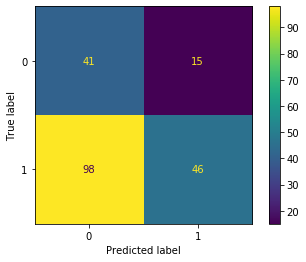

In [26]:
plot_confusion_matrix(logistic_regressor, x_test, y_test)

#### 5. 檢視回歸係數

In [53]:
print('-- Regression Coefficient --')
for col, coef in zip(feature_cols, logistic_regressor.coef_[0]):
    print('{:<16s}{:>+.8f}'.format(col, coef))

-- Regression Coefficient --
annual_inc      +0.00000251
dti             -0.01342476
inq_last_6mths  -0.00028560
